## Chapter 2 사이킷런으로 시작하는 머신러닝

### 1. 사이킷런 소개와 특징

사이킷런(sckit-learn) : 파이썬 머신러닝 라이브러리 중 가장 많이 이용됨

### 2. 첫 번째 머신러닝 만들어보기 - 붓꽃 품종 예측
### 3. 사이킷런의 기반 프레임워크 익히기

- Estimator 이해 및 fit(), predict() 메서드 <br/> ML 모델 학습을 위해 fit(), predict() 메서드가 제공된다. 사이킷런에서는 분류 알고리즘을 구현한 클래스로 Classifier로, 회귀 알고리즘을 구현한 클래스를 Regressor로 지칭한다. 이들을 합쳐 Estimator라고 한다. <br/> 비지도 학습에서도 fit()과 transform()을 적용한다. 비지도 학습에서의 fit()은 입력 데이터의 형태에 맞춰 데이터를 변환하기 위한 사전 구조를 맞추는 작업이고 transform()은 fit() 이후에 입력 데이터의 차원 변환, 클러스터링, 피처 추출 등의 실제 작업을 수행한다.
- 사이킷런의 주요 모델 <br/> 생략

### 4. Model Selection 모듈 소개

- 학습/테스트 데이터 세트 분리 : train_test_split() <br/>예측을 수행할 데이터 세트는 학습에 이용되지 않은 데이터여야 한다. train_test_split()으로 원본 데이터 세트를 학습/테스트 데이터 세트로 쉽게 분리할 수 있다. <br/>train_test_split() 은 첫 파라미터로 피처 데이터 세트, 두 번째 파라미터로 레이블 데이터 세트를 입력받는다. 선택적 파라미터는 다음과 같다.
    - test_size : 전체 데이터에서 테스트 데이터 크기를 얼마로 할 지 결정한다. 기본 값은 0.25 (최대 1)
    - train_size : 전체 데이터에서 학습 데이터 크기를 얼마로 할 지 결정한다. test_size가 있어 잘 사용하진 않음
    - shuffle : 데이터를 분리하기 전 섞을지 말지를 결정. 디폴트는 True
    - ramdom_state : 같은 결과가 필요할 때 같은 ramdom_state 값을 입력해야 함
    
반환 값은 튜플 형태이다.

In [1]:
# model selection 모듈 
# 학습/테스트 데이터 세트 분리 - train_test_split()

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

iris_data = load_iris()
df_clf = DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.3, random_state=121)

df_clf.fit(X_train, y_train)
pred = df_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9556


#### 교차 검증
<br/> 알고리즘 학습에는 학습 데이터와 예측 성능 평가를 위한 테스트용 데이터가 필요한데 이 역시 과적합에 취약하다. 이를 개선하기 위해 교차 검증을 이용해 더 다양한 학습과 평가를 수행한다. <br/>교차 검증은 데이터 편중을 막기 위해 학습 데이터 세트를 다시 학습 데이터와 검증 데이터로 나눈다. 그 후 별도의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행하는 것이다. <br/>대부분의 ML 모델의 성능 평가는 교차 겁증 기반으로 1차 평가를 한 뒤 테스트 데이터 세트에 적용해 평가하는 프로세스이다.

##### K 폴드 교차 검증 

가장 보편적으로 사용되는 교차 검증 기법이다. k개의 데이터 폴드 세트를 만들어 k번 만큼 각 폴드 세트에 학습과 검증 평가를 반복적으로 수행하는 방법이다.
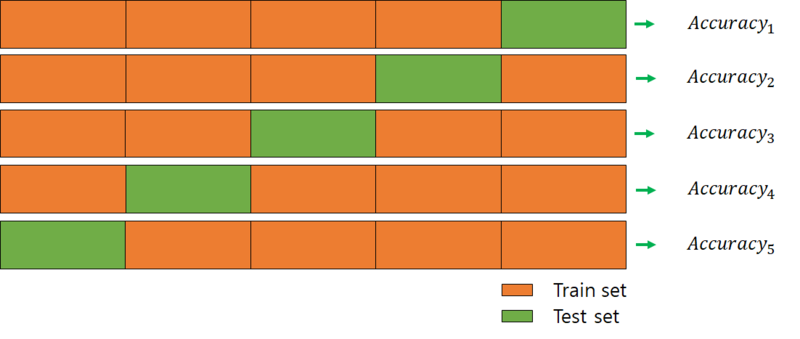

In [2]:
# 교차 검증
# k 폴드 교차 검증

from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성
kfold = KFold(n_splits=5)
cv_accuracy = []
print('붗꽃 데이터 세트 크기', features.shape[0])

붗꽃 데이터 세트 크기 150


In [3]:
n_iter = 0

# KFold객체의 split( ) 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환  
for train_index, test_index  in kfold.split(features):
    # kfold.split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    #학습 및 예측 
    dt_clf.fit(X_train , y_train)    
    pred = dt_clf.predict(X_test)
    n_iter += 1
    # 반복 시 마다 정확도 측정 
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
# 개별 iteration별 정확도를 합하여 평균 정확도 계산 
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 :0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 :0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 :0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 :0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9


##### Stratified K 폴드 
불균형한 분포도를 가진 레이블 데이터 집합을 위한 K 폴드 방식 (ex) 대출 사기 감지 등) <br/> K폴드의 경우 폴드 세트로 나누면서 레이블 균형이 무너질 수 있다. <br/> 사용법은 K폴드와 비슷하지만 레이블 데이터 세트가 필수적으로 필요하다. (K 폴드의 경우 필수적이진 않음)

In [4]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target

skf = StratifiedKFold(n_splits=3)
n_iter = 0

for train_index, test_index in skf.split(iris_df, iris_df['label']) :
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('##교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

##교차 검증: 1
학습 레이블 데이터 분포:
 2    34
1    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
0    17
2    16
Name: label, dtype: int64
##교차 검증: 2
학습 레이블 데이터 분포:
 1    34
2    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    17
0    17
1    16
Name: label, dtype: int64
##교차 검증: 3
학습 레이블 데이터 분포:
 0    34
2    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    17
1    17
0    16
Name: label, dtype: int64


In [5]:
features = iris.data
label = iris.target

dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]

# StratifiedKFold의 split() 호출 시 반드시 레이블 데이터 세트도 추가 입력 필요
for train_index, test_index in skfold.split(features, label) :
    #split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    
    # 반복 시마다 정확도 측정
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
# 교차 검증별 정확도 및 평균 정확도 계산
print('\n 교차 검증별 정확도 : ', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도 : ', np.mean(cv_accuracy))


#1 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 :0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

 교차 검증별 정확도 :  [0.98 0.94 0.98]
## 평균 검증 정확도 :  0.9666666666666667


##### 교차 검증을 보다 간편하게 - cross_val_score() 
사이킷런은 교차 검증을 좀 더편리하게 수행할 수 있게 API를 제공한다. 대표적인 것이 cross_val_score()이다. <br/> 직전 코드처럼 반복문을 쓸 필요가 없어진다. 원형은 다음과 같다.

> cross_val_score(estimator, X, y=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')

이 중 estimator, X, y, scoring, cv가 주요 파라미터이다.
- estimator : Classifier 또는 Regressor를 의미
- X : 피처 데이터 세트
- y : 레이블 데이터 세트
- scoring : 예측 성능 평가 지표
- cv : 교차 검증 폴드 수
- 반환값 : scoring 파라미터로 지정된 성능 지표 측정값을 배열 형태로 반환
- classifier가 입력되면 StratifiedKFold, 회귀인 경우 K폴드 방식으로 진행

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3)
print('교차 검증별 정확도: ', np.round(scores, 4))
print('평균 검증 정확도 : ', np.round(np.mean(scores), 4))

교차 검증별 정확도:  [0.98 0.94 0.98]
평균 검증 정확도 :  0.9667


#### GridSearchCV - 교차 검증과 하이퍼 파라미터 튜닝을 한 번에

GridSearchCV는 Classifier나 Regressor와 같은 알고리즘에 사용되는 하이퍼 파라미터를 순차적으로 입력하면서 편리하게 최적의 파라미터를 도출할 수 있는 방안을 제공한다.

In [7]:
grid_parameters = {'max_depth' : {1, 2, 3},
                   'min_samples_split' : [2, 3]
                  }

위와 같은 경우 총 6회에 걸쳐 파라미터를 순차적으로 바꿔 실행한다. ((1, 2), (1, 3), (2, 1) ... (3, 3)) <br/> GridSearchCV는 교차 검증을 기반으로 이 하이퍼 파라미터의 최적 값을 찾게 해준다. 하지만 상대적으로 시간이 오래 걸린다. <br/> 위의 경우 cv가 3회라면 총 18회의 학습/평가가 진행된다. <br/> 주요 파라미터는 다음과 같다.
- estiimator : classifier, regressor, pipeline이 사용될 수 있다.
- param_grid : key + 리스트 값을 가지는 딕셔너리가 주어딘다. estimator 튜닝을 위해 파라미터명과 사용되 ㅍ여러 파라미터 값을 지정한다.
- scoring : 예측 성능을 측정할 평가 방법을 지정한다. 별도의 성능 평가 지표 함수 지정 가능하다.
- cv : 교차 검증을 위해 분할되는 학습/테스트 세트의 개수 지정
- refit : 디폴트가 True이며 True로 생성 시 가장 최적의 하이퍼 파라미터를 찾은 뒤 입력된 estimator 객체를 해당 하이퍼 파라미터로 재학습시킨다.

In [8]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습 데이터와 테스트 데이터 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size=0.2, random_state=121)

dtree = DecisionTreeClassifier()

# 파라미터를 딕셔너리로 저장
parameters = {'max_depth' : [1, 2, 3], 'min_samples_split' : [2, 3]}

# param_grid의 하이퍼 파라미터를 3 개의 train, test set fold로 나누어 테스트 수행 설정
# refit은 True가 디폴트 (가장 좋은 파라미터 설정으로 재학습) 
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

# 붓꽃 학습 데이터로 param_grid의 하이퍼 파라미터를 순차적으로 학습/평가
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과를 추출해 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score',
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [9]:
print('GridSearchCV 최적 파라미터 : ', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터 :  {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.9750


In [10]:
# GridSearchCV의 refit으로 이미 학습된 estimator 반환
estimator = grid_dtree.best_estimator_

# best_estimator_는 이미 최적 학습이 된 상태, 별도 학습 필요 없음
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도 : {0:.4f}'.format(accuracy_score(y_test,pred)))

테스트 데이터 세트 정확도 : 0.9667


### 05. 데이터 전처리

데이터 전처리는 ML 알고리즘만큼 중요하다. 결손값은 허용되지 않기에 이를 어떤 값으로 채워야 한다. <br/>만약 Null 값이 얼마 없다면 피처의 평균값 등으로 대체할 수 있지만 너무 많다면 drop하는 것도 좋다. <br/>가장 힘든 경우가 일정 수준 이상인 경우인데 정확한 기준은 없다. 하지만 해당 피처가 중요도가 높고 평균값으로 대체할 경우 왜곡이 심하다면 더 정밀한 대체값을 선정해야 한다. <br/><br/> 또 머신러닝 알고리즘에 문자열 값을 입력할 수 없으므로 문자열은 인코딩해서 숫자형으로 변환해야 한다. 불필요한 피처는 인코딩하지 않고 삭제하는 것이 좋다.

#### 데이터 인코딩

대표적으로 레이블 인코딩과 원-핫 인코딩이 있다.

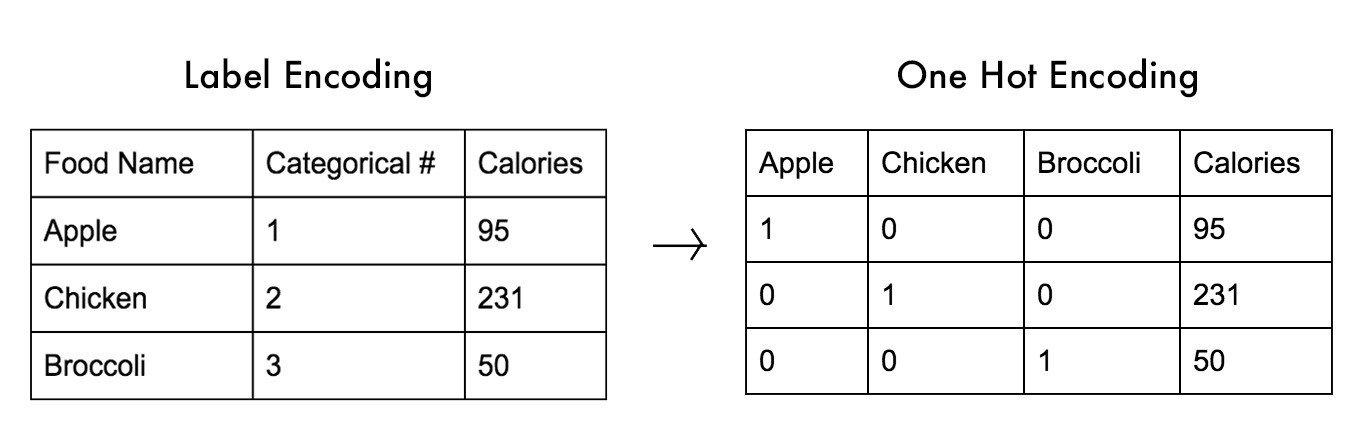

- 레이블 인코딩 <br/> 카티게로 피처를 코드형 숫자 값으로 변환하는 것이다. 예를 들면 TV: 1, 냉장고: 2, 전자레인지: 3, 컴퓨터: 4, 선풍기: 5, 믹서 6 과 같은 방식이다. <br/> 몇몇 ML 알고리즘에서 예측 성능을 저하시킨다. 이는 숫자 값의 크고 작음에 대한 특성이 작용하기 때문이다. 이러한 특성 때문에 레이블 인코딩은 선형 회귀와 같은 알고리즘에 작동시키면 안된다.

In [13]:
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# LabaelEncoder 객체를 생성한 후 fit()과 transform()으로 레이블 인코딩 수행
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값: ', labels)
# 문자열 값이 어떤 숫자 값으로 인코딩됐는지 확인
print('인코딩 클래스 ; ', encoder.classes_)
# 디코딩 역시 가능하다.
print('디코딩 원본값 : ', encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))

인코딩 변환값:  [0 1 4 5 3 3 2 2]
인코딩 클래스 ;  ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']
디코딩 원본값 :  ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


- 원-핫 인코딩<br/>원-핫 인코딩은 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당되는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시하는 방식이다.

In [15]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# 먼저 숫자 값으로 변환을 위해 LabelEncoder로 변환
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
# 2차원 데이터로 변환
labels = labels.reshape(-1, 1)

# 원 핫 인코딩 적용
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


In [16]:
# 판다스에서도 원-핫 인코딩을 쉽게 할 수 있도록 지원한다.
import pandas as pd

df = pd.DataFrame({'item' : ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


#### 피처 스케일링과 정규화

서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업을 피처 스케일링이라고 한다. 대표적인 방법으로 표준화와 정규화가 있다.

- 표준화 <br/>표준화는 데이터의 피처 각각이 평균이 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환하는 것을 의미한다. 
- 정규화 <br/>정규화는 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 개념이다. 예를 들어 피처 a가 거리를 나타내는 변수로 0 ~ 100KM의 값이 주어지고, B는 금액을 나타내는 속성으로 값이 0 ~ 1000억원이라면 이 변수를 모두 동일한 크기 단위로 비교하기 위해 값을 모두 최소 0 ~ 최대 1로 변환하는 것이다.

##### StandardScaler

표준화를 쉽게 지원하기 위한 클래스이다. 즉, 개별 피처를 평균이 0이고 분산이 1인 갑승로 변환해준다. SVM, 선형 회귀, 로지스틱 회귀는 가우시안 분포를 가지고 있다고 가정하고 구현되었기에 사전에 표준화를 적용하는 것이 중요한 요소이다.

In [17]:
from sklearn.datasets import load_iris
import pandas as pd
# 붓꽃 데이터 세트 로딩하고 DataFrame으로 반환
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature들의 평균 값')
print(iris_df.mean())
print('\nfeature들의 분산 값')
print(iris_df.var())

feature들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [18]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()
# StandardScaler로 데이터 세트 변환. fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform() 시 스케일 변환된 데이터 세트가 ndarray로 반환되어 이를 DataFrame으로 저장
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature들의 분산 값')
print(iris_df_scaled.var())

feature들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


##### MinMaxScaler

MinMaxScaler는 데이터값을 0과 1 사이의 범위값으로 변환한다. (음수 값이 있으면 -1에서 1값으로 변환)

In [19]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()
# MinMaxScaler로 데이터 세트 변환. fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform() 시 스케일 반환 된 ndarrary를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


#### 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점

Scaler 객체를 이용해 데이터의 스케일링 변환 시 fit(), transform(), fit_transform() 메소드를 이용한다.<br/>일반적으로 fit()은 데이터 변환을 위한 기준 정보 설정을 적용하며 transform()은 이렇게 설정된 정보를 이용해 데이터를 반환한다. fit_transform()은 이 둘을 한 번에 적용한다. <br/> 테스트 데이터에 대해서는 fit()하지 않는 것이 중요하다. 반드시 테스트 데이터는 학습 데이터의 스케일링 기준에 따라야 한다. 따라서 fit_transform() 역시 테스트 데이터에는 사용하면 안된다.

### 06. 사이킷런으로 수행하는 타이타닉 생존자 예측

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('./data/titanic_train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [23]:
# Age는 Null값을 평균으로 채우고, Cabin, Embarked는 N으로 채움

titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null 개수 : ', titanic_df.isnull().sum().sum())

데이터 세트 Null 개수 :  0


In [25]:
# 문자열 피처는 Sex, Cabin, Embarked 이다. 이 피처들의 값의 분류를 살피자

print('Sex 값 분포 : \n', titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 : \n', titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 ; \n', titanic_df['Embarked'].value_counts())

Sex 값 분포 : 
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 : 
 N              687
C23 C25 C27      4
B96 B98          4
G6               4
F2               3
              ... 
E31              1
C101             1
D48              1
D10 D12          1
C104             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 ; 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [26]:
# 다른 것은 큰 문제가 없는데, Cabin의 경우 N이 687로 압도적이다.
# 그런데 데이터를 보면 앞의 알파벳이 중요해 보이므로 이를 토대로 정리해보자.

titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
titanic_df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [28]:
# 영화에서 구조 순서 : 여성 아이들 노약자 다음으로 부자, 유명인
# 일단 성별에 따라 생존자 수를 비교해보자.

titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

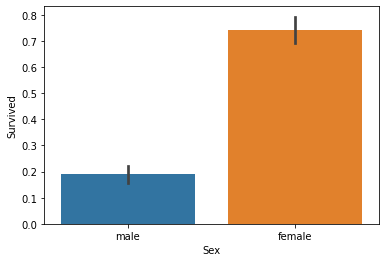

In [30]:
# 비교적 여성의 생존률이 높다.
# 그래프로 이를 다시 한 번 확인해보자.

sns.barplot(x='Sex', y='Survived', data=titanic_df)

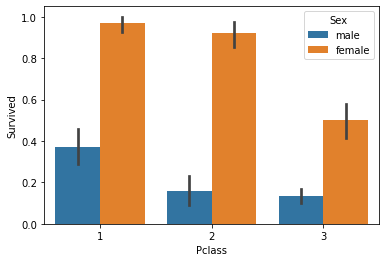

In [31]:
# 부자와 가난한 사람 간의 생존 확률을 비교해보자. (객실 등급에 따름)

sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

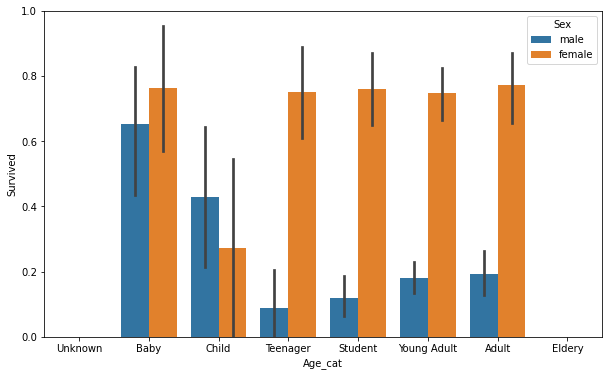

In [33]:
# 나이에 따른 생존률을 알아보자.

def get_category(age) :
    cat = ''
    if age <= -1 : cat = 'Unknown'
    elif age <= 5 : cat = 'Baby'
    elif age <= 12 : cat = 'Child'
    elif age <= 18 : cat = 'Teenager'
    elif age <= 25 : cat = 'Student'
    elif age <= 35 : cat = 'Young Adult'
    elif age <= 60 : cat = 'Adult'
    else : cat = 'Elderly'
        
    return cat

# 막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10, 6))

# X축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Eldery']

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

In [34]:
# 지금까지의 분석을 통해 Sex, Age, PClass 등이 생존을 좌웅하는 주요 피처임을 확인할 수 있었다.
# 남아있는 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환하자.

from sklearn import preprocessing

def encode_features(dataDF) :
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features :
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [35]:
# 여태까지 피처를 가공한 내역을 정리하고 이를 함수로 만들어 쉽게 재사용하도록 함

from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [36]:
# Survived 칼럼을 드롭해 피처 데이터 세트를 만들자.

#원본 데이터 재로딩, 핖처 데이터 세트와 레이블 데이터 세트 추출
titanic_df = pd.read_csv('./data/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                    test_size=0.2, random_state=11)

In [38]:
# 여러 모델들로 직접 생존자를 예측해보자.

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도: 0.8492


C:\Users\korea_1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [41]:
# 교차 검증을 사용해보자. (KFold)

from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한  리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증 수행. 
    for iter_count , (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산 
        clf.fit(X_train, y_train) 
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))     
    
    # 5개 fold에서의 평균 정확도 계산. 
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 
# exec_kfold 호출
exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [42]:
# 교차 검증 - cross_val_score

from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df , y_titanic_df , cv=5)
for iter_count,accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


In [43]:
# GridSearchCV

from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5)
grid_dclf.fit(X_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715
